### Importación de datos



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


# tienda1 = pd.read_csv('data/tienda_1.csv')
# tienda2 = pd.read_csv('data/tienda_2.csv')
# tienda3 = pd.read_csv('data/tienda_3.csv')
# tienda4 = pd.read_csv('data/tienda_4.csv')

tienda1.head(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [94]:
# Obtenemos el ingreso de las ventas de cada sucursal
sucursales_df = [tienda1,tienda2,tienda3,tienda4]
ingreso_ventas = np.array([np.sum(fact['Precio']) for fact in sucursales_df])
ingreso_ventas /= 1000000  # Dividimos entre 1 millon, para tener los valores en millones 
print(ingreso_ventas)

# Comparamos con el valor total que paga el cliente sumando el costo de envio
ingreso_total = np.array([(np.sum(fact['Precio']) + np.sum(fact['Costo de envío'])) for fact in sucursales_df])
ingreso_total /= 1000000  # Dividimos entre 1 millon, para tener los valores en millones 

print(ingreso_total)

[1150.8804 1116.3435 1098.0196 1038.3757]
[1212.2583 1175.8286 1156.5362 1093.6931]


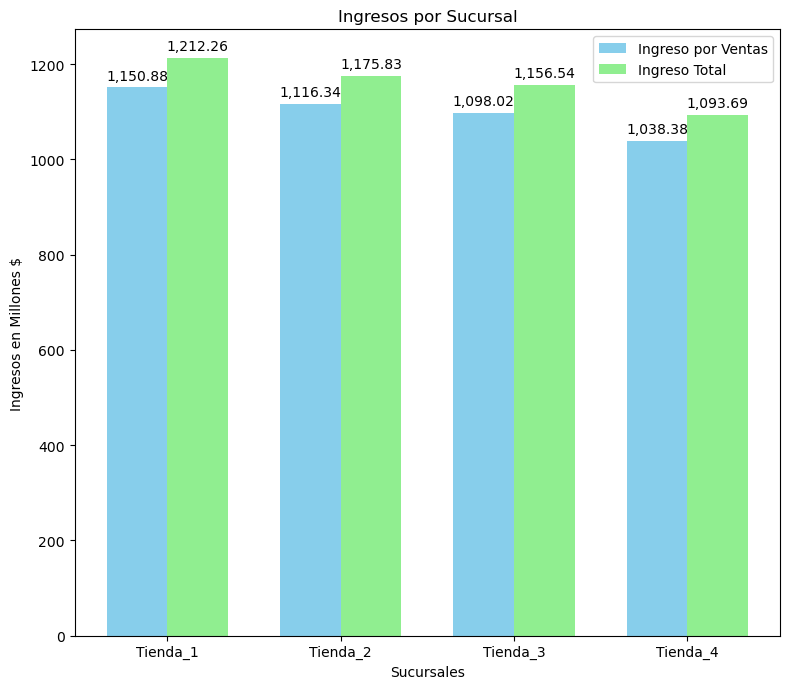

In [87]:
# Datos
sucursales = ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']

# Manejo de espacios y tamaño de grafica
x = np.arange(len(sucursales)) # Posiciones para las tiendas
ancho =.35
fig, ax = plt.subplots(figsize=(8,7))

# Barras
ax.bar(x-(ancho/2),ingreso_ventas,width=ancho,label='Ingreso por Ventas', color='skyblue')
ax.bar(x+(ancho/2),ingreso_total,width=ancho,label='Ingreso Total',color='lightgreen')

# Etiquetas y títulos
ax.set_xlabel('Sucursales')
ax.set_ylabel('Ingresos en Millones $')
ax.set_title('Ingresos por Sucursal')
ax.set_xticks(x)
ax.set_xticklabels(sucursales)
ax.legend()

for i in range(len(sucursales)):
    ax.text(x[i] - ancho/2, ingreso_ventas[i] + 10, f'{ingreso_ventas[i]:,.2f}', ha='center', va='bottom')
    ax.text(x[i] + ancho/2, ingreso_total[i] + 10, f'{ingreso_total[i]:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




Podemos visualizar que no existe diferencia entre los ingresos de solo las ventas en contraste con los ingreso totales que inclue el pago por envio a domicilio.

Tambien podemos ver que la sucursal que menos ingresos nos da es la ***Tienda 4***


# 2. Ventas por categoría

In [115]:
categorias = pd.DataFrame(sucursales_df[0]['Categoría del Producto'].unique())
categorias.rename(columns={0:'Categorias'},inplace=True)
categorias


,Categorias
0,Electrónicos
1,Muebles
2,Juguetes
3,Electrodomésticos
4,Artículos para el hogar
5,Deportes y diversión
6,Libros
7,Instrumentos musicales


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda